<center><h1>Give me Some Credit !</h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
# Set random seed
np.random.seed(0)

In [2]:
train_data = pd.read_csv('data\\cs-training.csv')
data = pd.read_csv('data\\cs-training.csv')
test_data = pd.read_csv('data\\cs-test.csv')
print ("training dataset shape is {}".format(train_data.shape))
print ("testing dataset shape is {}".format(test_data.shape))

training dataset shape is (150000, 12)
testing dataset shape is (101503, 12)


In [3]:
train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [5]:

col_names = train_data.columns.values
col_names[0] = 'ID' ## rename first column to ID
train_data.columns = col_names ## assign new column name to training dataset
test_data.columns = col_names ## assign new column name to testing dataset
data.columns = col_names

In [6]:
print ("Datos de entrenamiento")
train_data.head()

Datos de entrenamiento


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
print ("Datos de Prueba")
test_data.head()

Datos de Prueba


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [8]:
print(train_data.dtypes)

ID                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [9]:
print(test_data.dtypes)

ID                                        int64
SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


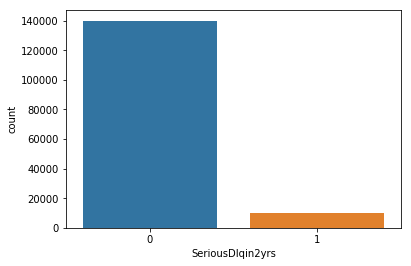

In [10]:
print(train_data['SeriousDlqin2yrs'].value_counts())
sns.countplot(x="SeriousDlqin2yrs", data=train_data)

In [11]:
def balance(df):
    # Class count
    count_SeriousDlqin2yrs_0, count_SeriousDlqin2yrs_1 = df['SeriousDlqin2yrs'].value_counts()
    # Divide by class
    df_SeriousDlqin2yrs_0 = df[df['SeriousDlqin2yrs'] == 0]
    df_SeriousDlqin2yrs_1 = df[df['SeriousDlqin2yrs'] == 1]
    df_SeriousDlqin2yrs_0_balanced = df_SeriousDlqin2yrs_0.sample(count_SeriousDlqin2yrs_1)
    data_balanced = pd.concat([df_SeriousDlqin2yrs_0_balanced, df_SeriousDlqin2yrs_1], axis=0)
    return data_balanced

Random under-sampling:
1    10026
0    10026
Name: SeriousDlqin2yrs, dtype: int64


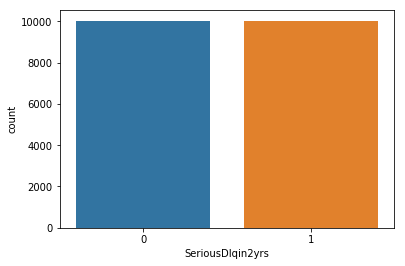

In [12]:
train_data_balanced = balance(train_data)

print('Random under-sampling:')
print(train_data_balanced['SeriousDlqin2yrs'].value_counts())

sns.countplot(x="SeriousDlqin2yrs", data=train_data_balanced)

In [13]:
train_data_balanced.isnull().sum()

ID                                         0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           3687
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       433
dtype: int64

In [14]:
def fixNAs(df):
    df['UnknownNumberOfDependents'] = 0
    df.loc[df['NumberOfDependents'].isnull(),'NumberOfDependents' ] = 0
    df.loc[df['NumberOfDependents'].isnull(),'UnknownNumberOfDependents' ] = 1

    df['UnknownMonthlyIncome'] = 0
    df.loc[df['MonthlyIncome'].isnull(),'MonthlyIncome' ] = 0
    df.loc[df['MonthlyIncome'].isnull(),'UnknownMonthlyIncome' ] = 1    
    
    #df['NumberOfDependents'] = df['NumberOfDependents'].fillna(0)
    #df['MonthlyIncome'] = df['MonthlyIncome'].fillna(0)
    return df

<center><h2>Arreglar DebtRadio</h2></center>
<br>
\begin{equation*}
debRatio = \frac{debt}{MonthlyIncome}
\end{equation*}

In [15]:
print(train_data['DebtRatio'].describe())
print(np.log(0.1))


def fixDebtRatio(df):
    df['ZeroDebtRatio'] = 0
    df.loc[df['DebtRatio'] == 0 ,'ZeroDebtRatio' ] = 1
    
    df['UnknownIncomeDebtRatio'] = 0
    df.loc[df['UnknownMonthlyIncome'] == 1 ,'UnknownIncomeDebtRatio' ] = 1
    
    df.loc[df['UnknownMonthlyIncome'] == 1 ,'DebtRatio' ] = 0
    
    df['Debt'] = df['MonthlyIncome'] * df['DebtRatio']
    
    df['Log.Debt'] = np.log(1 + df['Debt'])
    
    df = df.drop(['Debt'],axis=1,inplace=False)
    
    return df

    

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64
-2.3025850929940455


In [16]:
print(train_data['RevolvingUtilizationOfUnsecuredLines'].describe())
def fixRevolving(df):
    df['ZeroRevolvingUtilization'] = 0
    df.loc[df['RevolvingUtilizationOfUnsecuredLines'] == 0 ,'ZeroRevolvingUtilization' ] = 1
    
    df['WeirdRevolvingUtilization'] = 0
    df.loc[np.log(df['RevolvingUtilizationOfUnsecuredLines']) > 3 ,'WeirdRevolvingUtilization' ] = 1
    df.loc[np.log(df['RevolvingUtilizationOfUnsecuredLines']) > 3 ,'RevolvingUtilizationOfUnsecuredLines' ] = 0
    
    df['Weird0999Utilization'] = 0
    df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 0.9 ,'WeirdRevolvingUtilization'] = 1
    
    df['FullUtilization'] = 0
    df.loc[df['RevolvingUtilizationOfUnsecuredLines'] == 1 ,'FullUtilization'] = 1
    
    df['ExcessUtilization'] = 0
    df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1 ,'ExcessUtilization'] = 1
    
    df['Log.RevolvingUtilizationOfUnsecuredLines'] = np.log(df['RevolvingUtilizationOfUnsecuredLines'])
    #df.loc[df['Log_RevolvingUtilizationOfUnsecuredLines'].isnull(),'Log_RevolvingUtilizationOfUnsecuredLines'] = 0
    df.loc[df['Log.RevolvingUtilizationOfUnsecuredLines'].isin([np.nan, np.inf, -np.inf]),'Log.RevolvingUtilizationOfUnsecuredLines'] = 0
    
    df = df.drop(['RevolvingUtilizationOfUnsecuredLines'],axis=1,inplace=False)
    
    return df

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


In [17]:
def fixCreditLines(df):
    #numero de lineas de credito abiertas menos el numero de hipotecas
    df['RevolvingLines'] = df['NumberOfOpenCreditLinesAndLoans'] - df['NumberRealEstateLoansOrLines']
    df['HasRevolvingLines'] = 0
    df.loc[df['RevolvingLines'] > 0 ,'HasRevolvingLines'] = 1
    return df
    

In [18]:
def fixRealEstateLoan(df):
    df['HasRealEstateLoans'] = 0
    df.loc[df['NumberRealEstateLoansOrLines'] > 0 ,'HasRealEstateLoans'] = 1
    
    df['HasMultipleRealEstateLoans'] = 0
    df.loc[df['NumberRealEstateLoansOrLines'] > 1 ,'HasMultipleRealEstateLoans'] = 1
    
    df['Log.NumberRealEstateLoansOrLines'] = np.log(df['NumberRealEstateLoansOrLines'])
    df.loc[df['Log.NumberRealEstateLoansOrLines'].isin([np.nan, np.inf, -np.inf]),'Log.NumberRealEstateLoansOrLines'] = 0

    df = df.drop(['Log.NumberRealEstateLoansOrLines'],axis=1,inplace=False)
    
    return df
    

In [19]:
def fixNumberOfTimes(df):
    
    # Identificar outliers
    
    # cantidad de impagos entre 30 a 59 días 
    df['NumberOfTime30-59DaysPastDueNotWorseLarge'] = 0
    df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] > 90 ,'NumberOfTime30-59DaysPastDueNotWorseLarge'] = 1
    
    df['NumberOfTime30-59DaysPastDueNotWorse96'] = 0
    df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] == 96 ,'NumberOfTime30-59DaysPastDueNotWorse96'] = 1 
    
    df['NumberOfTime30-59DaysPastDueNotWorse98'] = 0
    df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] == 98 ,'NumberOfTime30-59DaysPastDueNotWorse98'] = 1

    df['Never30.59DaysPastDueNotWorse'] = 0
    df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] == 0 ,'Never30.59DaysPastDueNotWorse'] = 1
    
    df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] > 90 ,'NumberOfTime30-59DaysPastDueNotWorse'] = 0
    
    #cantidad de impagos 60 a 90
    
    df['NumberOfTime60-89DaysPastDueNotWorseLarge'] = 0
    df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] > 90 ,'NumberOfTime60-89DaysPastDueNotWorseLarge'] = 1    
    
    df['NumberOfTime60-89DaysPastDueNotWorse96'] = 0
    df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] == 96 ,'NumberOfTime60-89DaysPastDueNotWorse96'] = 1     

    df['NumberOfTime60-89DaysPastDueNotWorse98'] = 0
    df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] == 98 ,'NumberOfTime60-89DaysPastDueNotWorse98'] = 1    

    df['Never60.89DaysPastDueNotWorse'] = 0
    df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] == 0 ,'Never60.89DaysPastDueNotWorse'] = 1
    
    #este no estaba en el codigo original
    df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] > 90 ,'NumberOfTime60-89DaysPastDueNotWorse'] = 0
    
    #cantidad de impagos mayores a 90

    df['NumberOfTimes90DaysLateLarge'] = 0
    df.loc[df['NumberOfTimes90DaysLate'] > 90 ,'NumberOfTimes90DaysLateLarge'] = 1
    
    df['NumberOfTimes90DaysLate96'] = 0
    df.loc[df['NumberOfTimes90DaysLate'] == 96 ,'NumberOfTimes90DaysLate96'] = 1 
    
    df['NumberOfTimes90DaysLate98'] = 0
    df.loc[df['NumberOfTimes90DaysLate'] == 98 ,'NumberOfTimes90DaysLate98'] = 1

    df['Never90DaysLate'] = 0
    df.loc[df['NumberOfTimes90DaysLate'] == 0 ,'Never90DaysLate'] = 1
    
    df.loc[df['NumberOfTimes90DaysLate'] > 90 ,'NumberOfTimes90DaysLate'] = 0    
    
  
    #################################3

    df['NumberOfTime30.89DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTime60-89DaysPastDueNotWorse']
    df['Never30.89DaysPastDueNotWorse'] = df['Never60.89DaysPastDueNotWorse'] * df['Never30.59DaysPastDueNotWorse']
 

    df['NumberOfTimesPastDue'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTime60-89DaysPastDueNotWorse'] + df['NumberOfTimes90DaysLate']
    df['NumberOfTimesPastDue'] = df['Never90DaysLate'] * df['Never60.89DaysPastDueNotWorse'] * df['Never30.59DaysPastDueNotWorse']

    df['Log.NumberOfTimesPastDue'] = np.log(df['NumberOfTimesPastDue'])
    df.loc[df['Log.NumberOfTimesPastDue'].isin([np.nan, np.inf, -np.inf]),'Log.NumberOfTimesPastDue'] = 0

    df['Log.NumberOfTimes90DaysLate'] = np.log(df['NumberOfTimes90DaysLate'])
    df.loc[df['Log.NumberOfTimes90DaysLate'].isin([np.nan, np.inf, -np.inf]),'Log.NumberOfTimes90DaysLate'] = 0
    
    df['Log.NumberOfTime30-59DaysPastDueNotWorse'] = np.log(df['NumberOfTime30-59DaysPastDueNotWorse'])
    df.loc[df['Log.NumberOfTime30-59DaysPastDueNotWorse'].isin([np.nan, np.inf, -np.inf]),'Log.NumberOfTime30-59DaysPastDueNotWorse'] = 0

    df['Log.NumberOfTime60-89DaysPastDueNotWorse'] = np.log(df['NumberOfTime60-89DaysPastDueNotWorse'])
    df.loc[df['Log.NumberOfTime60-89DaysPastDueNotWorse'].isin([np.nan, np.inf, -np.inf]),'Log.NumberOfTime60-89DaysPastDueNotWorse'] = 0
    
    df['Log.Ratio90to30.59DaysLate'] = df['Log.NumberOfTimes90DaysLate'] - df['Log.NumberOfTime30-59DaysPastDueNotWorse']
    df['Log.Ratio90to60.89DaysLate'] = df['Log.NumberOfTimes90DaysLate'] - df['Log.NumberOfTime60-89DaysPastDueNotWorse']

    df = df.drop(['NumberOfTimesPastDue'],axis=1,inplace=False)
    df = df.drop(['NumberOfTimes90DaysLate'],axis=1,inplace=False)
    df = df.drop(['NumberOfTime30-59DaysPastDueNotWorse'],axis=1,inplace=False)
    df = df.drop(['NumberOfTime60-89DaysPastDueNotWorse'],axis=1,inplace=False)
    
    return df

In [20]:
def fixAge(df):
    df['EligibleSS'] = 0
    df.loc[df['age'] > 60 ,'EligibleSS'] = 1
    
    df['LowAge'] = 0
    df.loc[df['age'] <18 ,'LowAge'] = 1

    df['Log.age'] = np.log(df['age'])
    df.loc[df['Log.age'].isin([np.nan, np.inf, -np.inf]),'Log.age'] = 0
    df.loc[df['LowAge'] == 1 ,'Log.age'] = 0

    
    return df

In [21]:
def fixDebtClass(df):

    df['DTIOver33'] = 0
    df.loc[(df['DebtRatio'] > .33) & (df['MonthlyIncome'] >0) ,'DTIOver33'] = 1
  
  
    df['DTIOver45'] = 0
    df.loc[(df['DebtRatio'] > .45) & (df['MonthlyIncome'] >0) ,'DTIOver45'] = 1
  
    
    df['DisposableIncome'] = (1- df['DebtRatio']) * df['MonthlyIncome']
    df.loc[df['MonthlyIncome'] == 0 ,'DisposableIncome'] = 0
    
    #ingreso menos la deuda
    
    return df

In [22]:
def dataPipeline(df):
    df = fixNAs(df)
    df = fixDebtRatio(df)
    df = fixRevolving(df)
    df = fixCreditLines(df)
    df = fixRealEstateLoan(df)
    df = fixNumberOfTimes(df)
    df = fixAge(df)
    df = fixDebtClass(df)
    return df

In [23]:
train_data = dataPipeline(train_data_balanced)
test_data = dataPipeline(test_data)
data = dataPipeline(data)

C:\Users\javie\Anaconda3\envs\rstudio2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\javie\Anaconda3\envs\rstudio2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\javie\Anaconda3\envs\rstudio2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\javie\Anaconda3\envs\rstudio2\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
C:\Users\javie\Anaconda3\envs\rstudio2\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log
C:\Users\javie\Anaconda3\envs\rstudio2\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log
C:\Users\javie\Anaconda3\envs\rstudio2\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log


In [24]:
train_data.isnull().sum()

ID                                           0
SeriousDlqin2yrs                             0
age                                          0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberRealEstateLoansOrLines                 0
NumberOfDependents                           0
UnknownNumberOfDependents                    0
UnknownMonthlyIncome                         0
ZeroDebtRatio                                0
UnknownIncomeDebtRatio                       0
Log.Debt                                     0
ZeroRevolvingUtilization                     0
WeirdRevolvingUtilization                    0
Weird0999Utilization                         0
FullUtilization                              0
ExcessUtilization                            0
Log.RevolvingUtilizationOfUnsecuredLines     0
RevolvingLines                               0
HasRevolvingLines                            0
HasRealEstate

In [25]:
clf = RandomForestClassifier(n_estimators=100, verbose = 1)

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
x,y =  data.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False), data['SeriousDlqin2yrs']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
clf.fit(x_train,y_train)

#train_y = train_data['SeriousDlqin2yrs']
#train_X = train_data.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False)
#clf.fit(train_X,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [27]:
probs = clf.predict_proba(x_test)
auc = roc_auc_score(y_test,probs[:, 1])
print('AUC: %.3f' % auc)

#test_X = test_data.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False)
#y_pred = clf.predict(test_X)
#y_pred_prob = clf.predict_proba(test_X)[:,0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished


In [28]:
list(zip(test_X.columns.values , clf.feature_importances_))

[('age', 0.062233841964048235),
 ('DebtRatio', 0.07795599427736088),
 ('MonthlyIncome', 0.06021075279204609),
 ('NumberOfOpenCreditLinesAndLoans', 0.04880917038250618),
 ('NumberRealEstateLoansOrLines', 0.018597405271502717),
 ('NumberOfDependents', 0.025587008076937586),
 ('UnknownNumberOfDependents', 0.0),
 ('UnknownMonthlyIncome', 0.0),
 ('ZeroDebtRatio', 0.001417632173289159),
 ('UnknownIncomeDebtRatio', 0.0),
 ('Log.Debt', 0.06315118435802279),
 ('ZeroRevolvingUtilization', 0.007230193300704136),
 ('WeirdRevolvingUtilization', 0.03659605433186755),
 ('Weird0999Utilization', 0.0),
 ('FullUtilization', 6.806085769073337e-05),
 ('ExcessUtilization', 0.006885208957199911),
 ('Log.RevolvingUtilizationOfUnsecuredLines', 0.12823851727991023),
 ('RevolvingLines', 0.04797968607392745),
 ('HasRevolvingLines', 0.0023354776621563205),
 ('HasRealEstateLoans', 0.005226111182017546),
 ('HasMultipleRealEstateLoans', 0.006074132518807156),
 ('NumberOfTime30-59DaysPastDueNotWorseLarge', 0.000141001

In [29]:
yout = pd.DataFrame({'Id':test_data.ID.values,'Probability':probs[:, 1]})
probability_no = yout[yout['Probability']<.5]
probability_si = yout[yout['Probability']>.5]
print("probabilidad no : {}".format(len(probability_no)))
print("probabilidad si : {}".format(len(probability_si)))

yout2 = pd.DataFrame({'Id':test_data.ID.values,'Probability':y_pred})
yout2['Probability'].value_counts()

yout.to_csv('random_forest_result.csv',index=False)

probabilidad no : 25460
probabilidad si : 75287


In [30]:
#Evaluacion
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


x,y =  data.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False), data['SeriousDlqin2yrs']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
clf.fit(x_train,y_train)
#prediction = clf.predict(x_test)
#print('With Random Forest accuracy is: ',clf.score(x_test,y_test)) # accuracy

probs = clf.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


With Random Forest accuracy is:  0.9356222222222222
AUC: 0.836


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished


In [31]:
# Kaggle : 0.834726
0.834726

0.834726

In [32]:
#https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/
#https://github.com/wenbo5565/Kaggle-Competition-Give-Me-Some-Credit/blob/master/Solution%20to%20Kaggle%20Competition%20-%20Give%20Me%20Some%20Credit.ipynb